# 01_EDA_and_preprocessing (Diabetes)
**Dataset**: Pima Indians Diabetes (Binary Classification)  
**Target**: `Outcome` (0/1)

In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['axes.grid'] = True

# --------------------------------------------------------------------
# ✅ Define project root and directories (works both inside /notebooks and root)
project_root = Path(os.getcwd()).resolve()
if project_root.name == "notebooks":
    project_root = project_root.parent

RAW = project_root / "data" / "raw"
PROC = project_root / "data" / "processed"

RAW.mkdir(parents=True, exist_ok=True)
PROC.mkdir(parents=True, exist_ok=True)
# --------------------------------------------------------------------

# ✅ Dataset path
csv_path = RAW / "diabetes.csv"
print("Resolved path:", csv_path)

assert csv_path.exists(), f"❌ CSV not found at {csv_path}"

# ✅ Load dataset
df = pd.read_csv(csv_path)
print("✅ Shape:", df.shape)
df.head()


Resolved path: /mnt/e/AI/fcnn-classification-project/fcnn-classification-project/data/raw/diabetes.csv
✅ Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# general looking at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# descriptive statistical on data
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# converts zeros to NaN
import numpy as np
zero_as_na_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in zero_as_na_cols:
    df[c] = df[c].replace(0, np.nan)
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

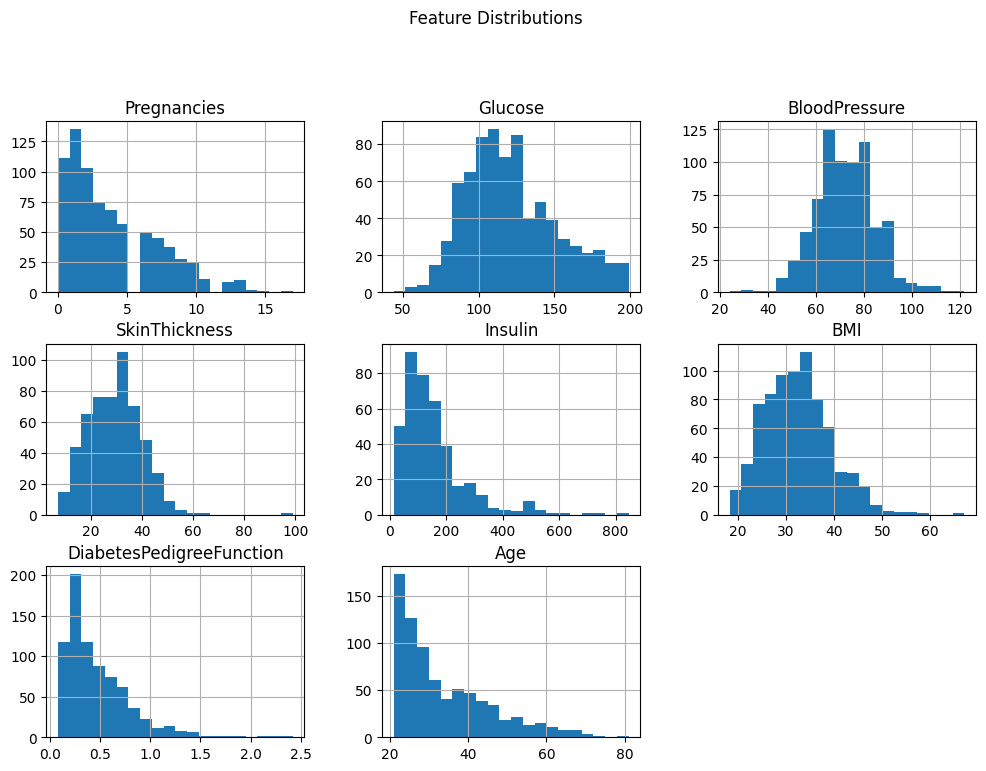

In [6]:
# Feature Distributions
num_cols = [c for c in df.columns if c != 'Outcome']
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Feature Distributions', y=1.02)
plt.show()

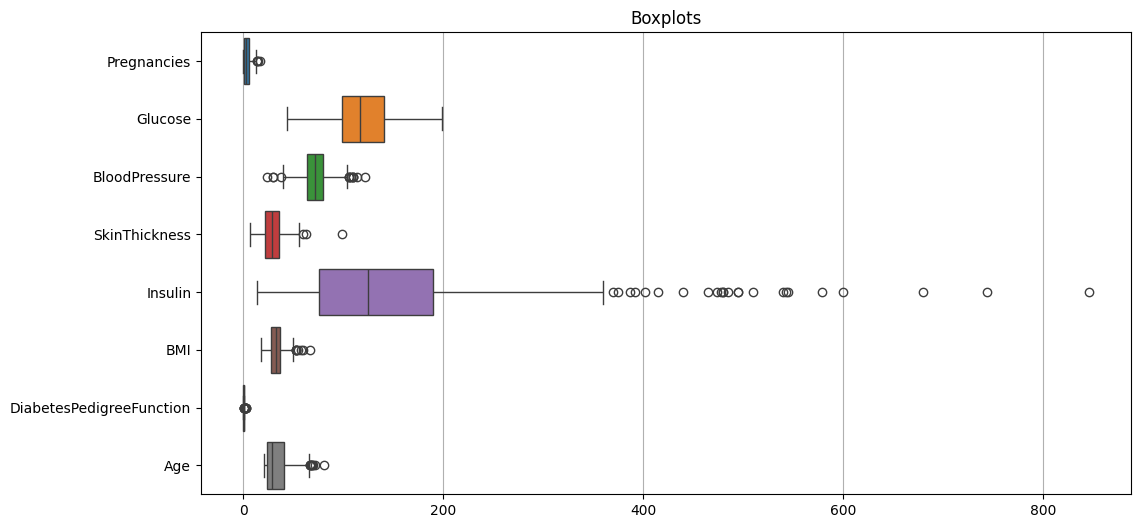

In [7]:
# Box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Boxplots')
plt.show()

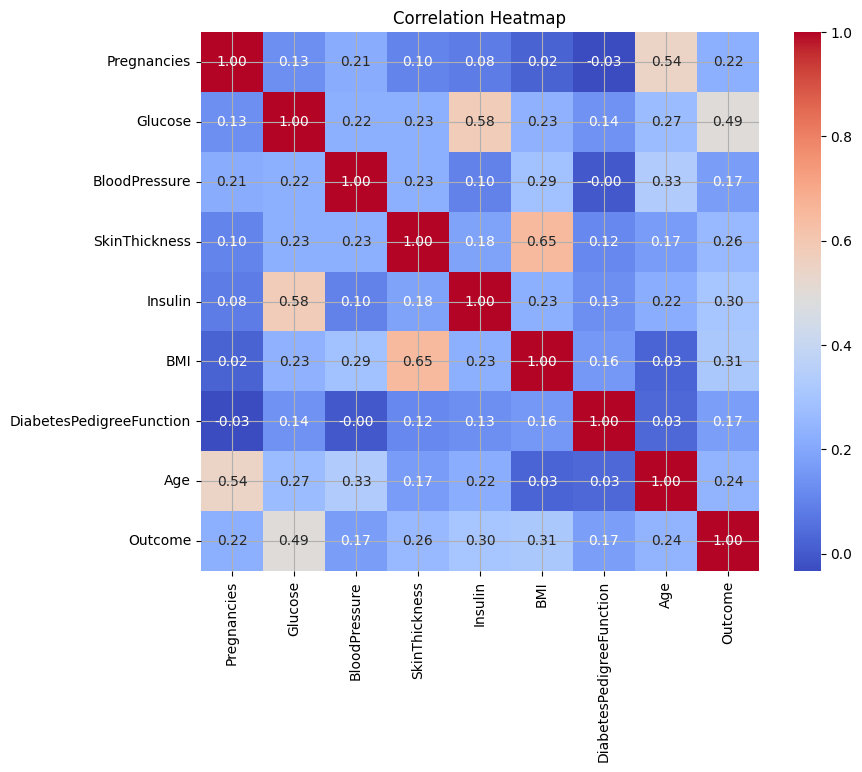

In [8]:
# correlation
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

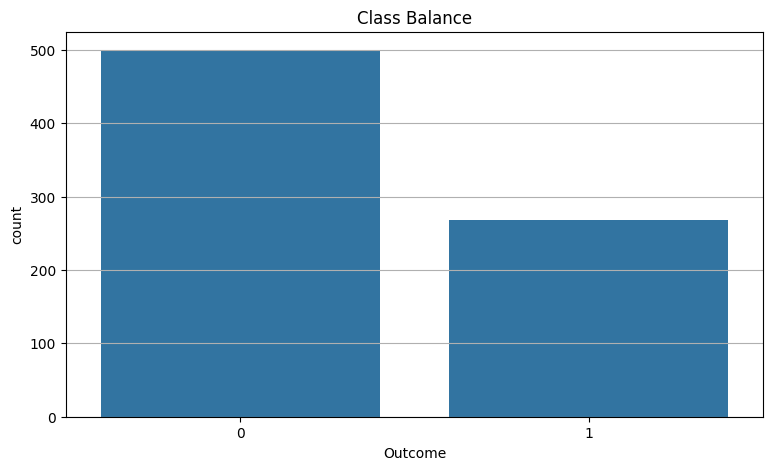

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [9]:
# features balance
sns.countplot(x='Outcome', data=df)
plt.title('Class Balance')
plt.show()
df['Outcome'].value_counts(normalize=True)

In [10]:
# --- Save EDA figures to visualizations/eda_plots ---
EDA_DIR = project_root / "visualizations" / "eda_plots"
EDA_DIR.mkdir(parents=True, exist_ok=True)

# 1) Histograms
ax = df[[c for c in df.columns if c != 'Outcome']].hist(bins=20, figsize=(12,8))
plt.suptitle('Feature Distributions', y=1.02)
plt.tight_layout()
plt.savefig(EDA_DIR / "01_feature_histograms.png", dpi=180)
plt.close('all')

# 2) Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[[c for c in df.columns if c != 'Outcome']], orient='h')
plt.title('Boxplots')
plt.tight_layout()
plt.savefig(EDA_DIR / "02_boxplots.png", dpi=180)
plt.close()

# 3) Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig(EDA_DIR / "03_corr_heatmap.png", dpi=180)
plt.close()

# 4) Class Balance
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Class Balance')
plt.tight_layout()
plt.savefig(EDA_DIR / "04_class_balance.png", dpi=180)
plt.close()

# 5) Pairwise scatter (small subset to avoid heaviness)
subset = ['Glucose','BMI','Age','BloodPressure','Outcome']
sns.pairplot(df[subset], hue='Outcome', diag_kind='hist')
plt.savefig(EDA_DIR / "05_pairplot_subset.png", dpi=180)
plt.close('all')

print("Saved EDA figures to:", EDA_DIR)


Saved EDA figures to: /mnt/e/AI/fcnn-classification-project/fcnn-classification-project/visualizations/eda_plots


In [11]:
# Preprocessing: Impute + Scale + Split (70/15/15)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

target_col = 'Outcome'
y = df[target_col].astype(int)
X = df.drop(columns=[target_col])

num_cols = list(X.columns)
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
pre = ColumnTransformer([('num', num_pipe, num_cols)], remainder='drop')

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test  = train_test_split(X_tmp, y_tmp, test_size=0.50, random_state=42, stratify=y_tmp)

X_train_p = pre.fit_transform(X_train)
X_val_p   = pre.transform(X_val)
X_test_p  = pre.transform(X_test)

print('Shapes:', X_train_p.shape, X_val_p.shape, X_test_p.shape)

Shapes: (537, 8) (115, 8) (116, 8)


In [12]:
# save CSVs + scaler.pkl
import pandas as pd
def to_df(arr, prefix='f'):
    if hasattr(arr, 'toarray'):
        arr = arr.toarray()
    return pd.DataFrame(arr, columns=[f'{prefix}{i}' for i in range(arr.shape[1])])

train_df = to_df(X_train_p, 'f'); train_df['target'] = y_train.values
val_df   = to_df(X_val_p,   'f'); val_df['target']   = y_val.values
test_df  = to_df(X_test_p,  'f'); test_df['target']  = y_test.values

train_df.to_csv(PROC/'train.csv', index=False)
val_df.to_csv(PROC/'val.csv', index=False)
test_df.to_csv(PROC/'test.csv', index=False)

import joblib
joblib.dump(pre, PROC/'scaler.pkl')

print('Saved:', PROC/'train.csv', PROC/'val.csv', PROC/'test.csv', PROC/'scaler.pkl')

Saved: /mnt/e/AI/fcnn-classification-project/fcnn-classification-project/data/processed/train.csv /mnt/e/AI/fcnn-classification-project/fcnn-classification-project/data/processed/val.csv /mnt/e/AI/fcnn-classification-project/fcnn-classification-project/data/processed/test.csv /mnt/e/AI/fcnn-classification-project/fcnn-classification-project/data/processed/scaler.pkl
